## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Load and check data

In [3]:
data = pd.read_csv(r'AirPassengers.csv')
data.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
data.shape

(144, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0.5, 1.0, 'Number of Passengers accrossing to Months')

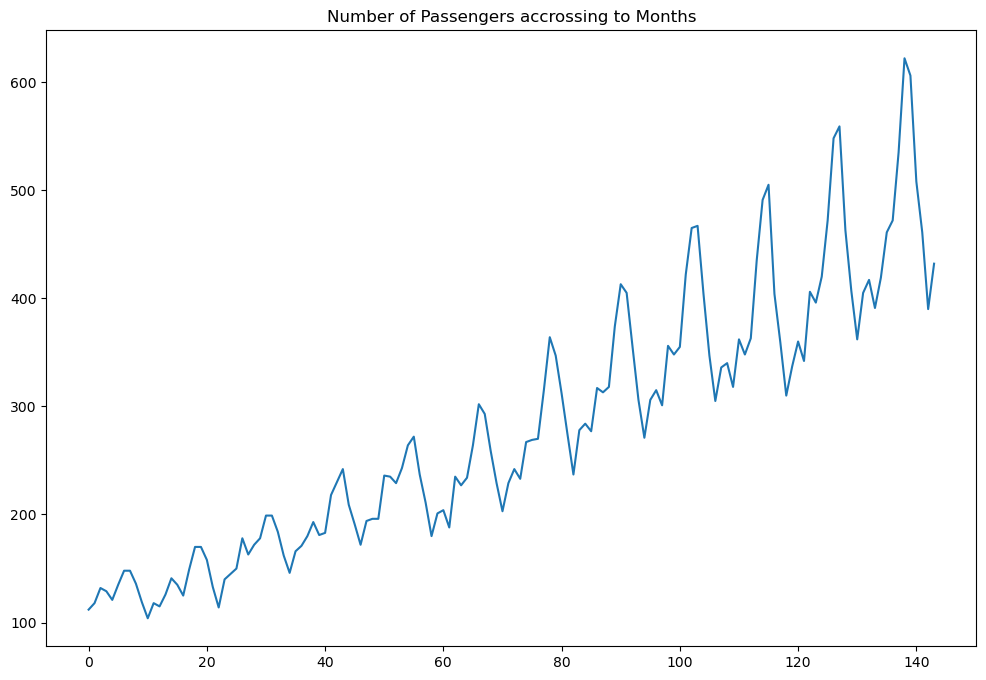

In [7]:
plt.figure(figsize=(12,8))
plt.plot(data['#Passengers'])
plt.title("Number of Passengers accrossing to Months")

In [8]:
dataset = data.drop(columns='Month')
dataset[:5]

,#Passengers
0,112
1,118
2,132
3,129
4,121


## Data Preparation

In [9]:
dataset = dataset.astype('float32')

In [23]:
#Define function to split sequence
def split_sequence(sequence, n_steps):
    X,y = list(), list()
    for i in range(len(sequence)):
        #find the end of this pattern
        end_ix = i + n_steps
        #check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [25]:
train_size = int(len(dataset) * 0.67)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [26]:
n_steps = 12
X_train, y_train = split_sequence(train, n_steps)
X_test, y_test = split_sequence(test, n_steps)

In [27]:
X_train[:3]

array([[[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104]]], dtype=float32)

In [28]:
X_train.shape

(84, 12, 1)

In [29]:
y_train[:2]

array([[0.02123553],
       [0.04247104]], dtype=float32)

In [30]:
X_test.shape

(36, 12, 1)

In [31]:
y_test.shape

(36, 1)

In [32]:
n_features = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], n_features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

## RNN Model for Regression

In [34]:
model = Sequential()
model.add(SimpleRNN(2,activation='relu',input_shape=(n_steps, n_features)))
model.add(Dense(1,activation='relu'))

In [35]:
#Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 8         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, batch_size=1, epochs=50, verbose=1)

Epoch 1/50
84/84 [==============================] - 2s 3ms/step - loss: 0.0727
Epoch 2/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 5/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 6/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 8/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 9/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 10/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 11/50
84/84 [==============================] - 0s 3ms/step - loss: 0.0727
Epoch 12/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 13/50
84/84 [==============================

In [37]:
#make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [38]:
trainPredict.shape

(84, 1)

In [39]:
testPredict.shape

(36, 1)

In [41]:
#error of predictions
train_rmse=math.sqrt(mean_squared_error(y_train, trainPredict))
test_rmse = math.sqrt(mean_squared_error(y_test, testPredict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))

Train RMSE: 0.270 RMSE
Test RMSE: 0.644 RMSE


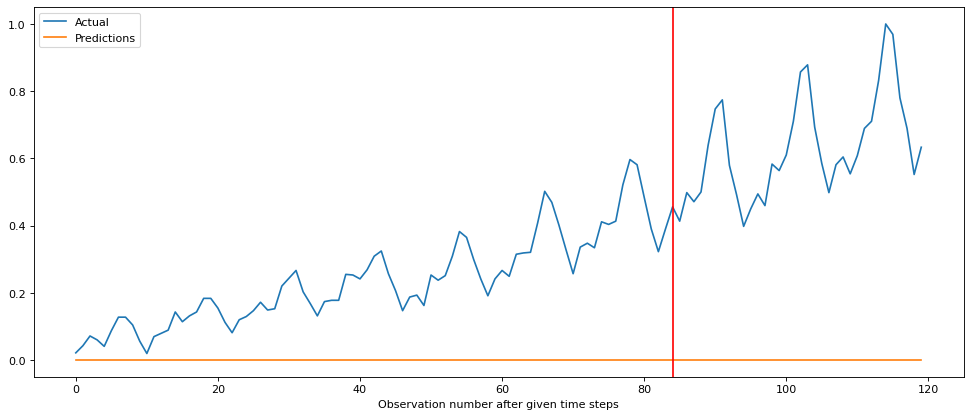

In [43]:
#Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    
plot_result(y_train,y_test, trainPredict, testPredict)